# Análise Comparativa da Evolução Modal entre as Pesquisas Origem-Destino (OD)

## Overview
Este notebook compara a distribuição modal (%) entre as diferentes edições da pesquisa OD, identificando tendências e variações no uso dos principais meios de transporte ao longo dos anos.

### Principais meios de transporte
1. Ônibus
2. Automóvel
3. Táxi
4. Moto
5. Bicicleta
6. A pé
7. Metrô 

Dúvidas:
1. Devo incluir lotação/perua como ônibus em algumas ODs?

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos arquivos das ODs

In [124]:
od_23_path = "../data/OD/ODS/od23_all.csv"
od_17_path = "../data/OD/ODS/od_2017.csv"
od_07_path = "../data/OD/ODS/OD_2007.csv"
od_97_path = "../data/OD/ODS/OD_1997.csv"
od_87_path = "../data/OD/ODS/OD_1987.csv"
od_77_path = "../data/OD/ODS/OD_1977.csv"

In [125]:
df_23 = pd.read_csv(od_23_path)
df_17 = pd.read_csv(od_17_path)
df_07 = pd.read_csv(od_07_path)
df_97 = pd.read_csv(od_97_path)
df_87 = pd.read_csv(od_87_path)
df_77 = pd.read_csv(od_77_path)

In [126]:
def mode_rep(od_df, col_transp_means, col_exp_fact, mode_value):
    """
    Calcula a representatividade percentual de viagens realizadas em determinado meio de transporte em uma pesquisa OD.

    Parâmetros:
        od_df (pd.DataFrame): DataFrame da pesquisa OD.
        col_transp_means (str): Nome da coluna que indica o modo de transporte principal.
        col_exp_fact (str): Nome da coluna do fator de expansão.
        mode_value (int): Valor na coluna de modo de transporte que representa determinado meio de transporte.

    Retorna:
        float: Percentual de viagens realizadas por de terminado meio de transporte, arredondado para duas casas decimais.
    """
    df = od_df.groupby(col_transp_means)[col_exp_fact].sum()
    df_normalizado = (df / df.sum()) * 100

    return df_normalizado[mode_value].round(2)

Declaração dos principais meios de transporte e edições da pesquisa OD

In [127]:
main_transport_modes = ["Ônibus", "Automóvel", "Táxi", "Moto", "Bicicleta", "A Pé", "Metrô"]
od_years = ["1977", "1987", "1997", "2007", "2017", "2023"]

final_df = pd.DataFrame(columns=od_years, index=main_transport_modes)

### [OD-1977] Representatividade dos principais meios de transporte

- Ônibus (trólebus)
- Automóvel (dirigindo + passageiro)
- Táxi
- Metrô + trem
- Bicicleta 
- A Pé

*Ônibus Escolar/Empresa, Lotação/Perua e Outros não foram incluídos

In [128]:
# Dict com os modos e valores da col de modoprin
od_77_modes = {
    "Ônibus Trólebus": 1,
    "Dirigindo Automóvel": 3,
    "Passageiro de Automóvel": 4,
    "Táxi": 5,
    "Metrô": 7,
    "Trem": 8,
    "Bicicleta": 10,
    "A Pé": 11 
}

In [129]:
# Calcula a representatividade de todos os meios 
representation_df_77 = df_77.copy()
representation_df_77 = representation_df_77.groupby('modoprin')['fe_via'].sum()
representation_df_77 = (representation_df_77 / representation_df_77.sum()) * 100

In [130]:
# Mapeia os principais meios de transporte e seus percentuais
main_modes_percent_77 = {
    mode: representation_df_77.get(code, 0) for mode, code in od_77_modes.items()
}
# Transforma o dict em df
main_modes_77_df = pd.DataFrame(main_modes_percent_77, index=["Percentual"]).T

In [131]:
# Adiciona os percentuais ao dataframe de análise final
final_df.loc["Ônibus", "1977"] = main_modes_77_df.loc["Ônibus Trólebus", "Percentual"]
final_df.loc["Automóvel", "1977"] = main_modes_77_df.loc["Dirigindo Automóvel", "Percentual"] + main_modes_77_df.loc["Passageiro de Automóvel", "Percentual"] 
final_df.loc["Táxi", "1977"] = main_modes_77_df.loc["Táxi", "Percentual"]
final_df.loc["Moto", "1977"] = None
final_df.loc["Bicicleta", "1977"] = main_modes_77_df.loc["Bicicleta", "Percentual"]
final_df.loc["A Pé", "1977"] = main_modes_77_df.loc["A Pé", "Percentual"]
final_df.loc["Metrô", "1977"] = main_modes_77_df.loc["Metrô", "Percentual"] + main_modes_77_df.loc["Trem", "Percentual"] 
final_df

,1977,1987,1997,2007,2017,2023
Ônibus,37.099253,NaN,NaN,NaN,NaN,NaN
Automóvel,23.865688,NaN,NaN,NaN,NaN,NaN
Táxi,2.401129,NaN,NaN,NaN,NaN,NaN
Moto,None,NaN,NaN,NaN,NaN,NaN
Bicicleta,0.331771,NaN,NaN,NaN,NaN,NaN
A Pé,28.025204,NaN,NaN,NaN,NaN,NaN
Metrô,4.874257,NaN,NaN,NaN,NaN,NaN


### [OD-1987] Representatividade dos principais meios de transporte 

- Ônibus (Diesel + Trólebus)
- Automóvel (dirigindo + passageiro)
- Táxi
- Metrô + trem
- Moto
- Bicicleta 
- A pé

*Ônibus Fretado, Escolar, Lotação/Perua, Caminhão e Outros não foram incluídos

In [132]:
# Dict com os modos e valores da col de modoprin
od_87_modes = {
    "Ônibus Diesel": 1,
    "Trólebus": 2,
    "Dirigindo Automóvel": 5,
    "Passageiro de Automóvel": 6,
    "Táxi": 7,
    "Metrô": 9,
    "Trem": 10,
    "Moto": 11,
    "Bicicleta": 12,
    "A Pé": 13 
}

In [133]:
# Calcula a representatividade de todos os meios 
representation_df_87 = df_87.copy()
representation_df_87 = representation_df_87.groupby('modoprin')['fe_via'].sum()
representation_df_87 = (representation_df_87 / representation_df_87.sum()) * 100

In [134]:
# Mapeia os principais meios de transporte e seus percentuais
main_modes_percent_87 = {
    mode: representation_df_87.get(code, 0) for mode, code in od_87_modes.items()
}
# Transforma o dict em df
main_modes_87_df = pd.DataFrame(main_modes_percent_87, index=["Percentual"]).T

In [135]:
# Adiciona os percentuais ao dataframe de análise final
final_df.loc["Ônibus", "1987"] = main_modes_87_df.loc["Ônibus Diesel", "Percentual"] + main_modes_87_df.loc["Trólebus", "Percentual"]
final_df.loc["Automóvel", "1987"] = main_modes_87_df.loc["Dirigindo Automóvel", "Percentual"] + main_modes_87_df.loc["Passageiro de Automóvel", "Percentual"] 
final_df.loc["Táxi", "1987"] = main_modes_87_df.loc["Táxi", "Percentual"]
final_df.loc["Moto", "1987"] = main_modes_87_df.loc["Moto", "Percentual"]
final_df.loc["Bicicleta", "1987"] = main_modes_87_df.loc["Bicicleta", "Percentual"]
final_df.loc["A Pé", "1987"] = main_modes_87_df.loc["A Pé", "Percentual"]
final_df.loc["Metrô", "1987"] = main_modes_87_df.loc["Metrô", "Percentual"] + main_modes_87_df.loc["Trem", "Percentual"] 
final_df

,1977,1987,1997,2007,2017,2023
Ônibus,37.099253,24.057406,NaN,NaN,NaN,NaN
Automóvel,23.865688,26.21166,NaN,NaN,NaN,NaN
Táxi,2.401129,0.385626,NaN,NaN,NaN,NaN
Moto,None,0.615539,NaN,NaN,NaN,NaN
Bicicleta,0.331771,0.367286,NaN,NaN,NaN,NaN
A Pé,28.025204,36.225015,NaN,NaN,NaN,NaN
Metrô,4.874257,8.002155,NaN,NaN,NaN,NaN


### [OD-1997] Representatividade dos principais meios de transporte 

- Ônibus (Diesel)
- Automóvel (dirigindo + passageiro)
- Táxi
- Metrô + trem
- Moto
- Bicicleta 
- A pé

*Ônibus Fretado, Transporte Escolar, Lotação/Perua e Outros não foram incluídos

In [136]:
# Dict com os modos e valores da col de modoprin
od_97_modes = {
    "Ônibus": 1,
    "Dirigindo Automóvel": 4,
    "Passageiro de Automóvel": 5,
    "Táxi": 6,
    "Metrô": 8,
    "Trem": 9,
    "Moto": 10,
    "Bicicleta": 11,
    "A Pé": 12 
}

In [137]:
# Calcula a representatividade de todos os meios 
representation_df_97 = df_97.copy()
representation_df_97 = representation_df_97.groupby('modoprin')['fe_via'].sum()
representation_df_97 = (representation_df_97 / representation_df_97.sum()) * 100

In [138]:
# Mapeia os principais meios de transporte e seus percentuais
main_modes_percent_97 = {
    mode: representation_df_97.get(code, 0) for mode, code in od_97_modes.items()
}
# Transforma o dict em df
main_modes_97_df = pd.DataFrame(main_modes_percent_97, index=["Percentual"]).T

In [139]:
# Adiciona os percentuais ao dataframe de análise final
final_df.loc["Ônibus", "1997"] = main_modes_97_df.loc["Ônibus", "Percentual"]
final_df.loc["Automóvel", "1997"] = main_modes_97_df.loc["Dirigindo Automóvel", "Percentual"] + main_modes_97_df.loc["Passageiro de Automóvel", "Percentual"] 
final_df.loc["Táxi", "1997"] = main_modes_97_df.loc["Táxi", "Percentual"]
final_df.loc["Moto", "1997"] = main_modes_97_df.loc["Moto", "Percentual"]
final_df.loc["Bicicleta", "1997"] = main_modes_97_df.loc["Bicicleta", "Percentual"]
final_df.loc["A Pé", "1997"] = main_modes_97_df.loc["A Pé", "Percentual"]
final_df.loc["Metrô", "1997"] = main_modes_97_df.loc["Metrô", "Percentual"] + main_modes_97_df.loc["Trem", "Percentual"] 
final_df

,1977,1987,1997,2007,2017,2023
Ônibus,37.099253,24.057406,22.44842,NaN,NaN,NaN
Automóvel,23.865688,26.21166,30.657521,NaN,NaN,NaN
Táxi,2.401129,0.385626,0.328953,NaN,NaN,NaN
Moto,None,0.615539,0.46338,NaN,NaN,NaN
Bicicleta,0.331771,0.367286,0.516861,NaN,NaN,NaN
A Pé,28.025204,36.225015,34.398609,NaN,NaN,NaN
Metrô,4.874257,8.002155,7.462876,NaN,NaN,NaN


### [OD-2007] Representatividade dos principais meios de transporte

- Ônibus (Munipício S.Paulo + outros Municípios + Metropolitano) + Microônibus/Van (Munipício S.Paulo + outros Municípios + Metropolitano)
- Automóvel (dirigindo + passageiro)
- Táxi
- Metrô + Trem
- Moto
- Bicicleta 
- A pé

*Ônibus Fretado, Escolar, Lotação/Perua e Outros não foram incluídos

In [140]:
# Dict com os modos e valores da col de modoprin
od_07_modes = {
    "Ônibus Município S.Paulo": 1,
    "Ônibus outros Municípios": 2,
    "Ônibus Metropolitano": 3,
    "Dirigindo Automóvel": 6,
    "Passageiro de Automóvel": 7,
    "Táxi": 8,
    "Microônibus/Van Município de S.Paulo": 9,
    "Microônibus/Van outros Município": 10,
    "Microônibus/Van Metropolitano": 11,
    "Metrô": 12,
    "Trem": 13,
    "Moto": 14,
    "Bicicleta": 15,
    "A pé": 16
}

In [141]:
# Calcula a representatividade de todos os meios 
representation_df_07 = df_07.copy()
representation_df_07 = representation_df_07.groupby('modoprin')['fe_via'].sum()
representation_df_07 = (representation_df_07 / representation_df_07.sum()) * 100

In [142]:
# Mapeia os principais meios de transporte e seus percentuais
main_modes_percent_07 = {
    mode: representation_df_07.get(code, 0) for mode, code in od_07_modes.items()
}
# Transforma o dict em df
main_modes_07_df = pd.DataFrame(main_modes_percent_07, index=["Percentual"]).T

In [143]:
# Adiciona os percentuais ao dataframe de análise final
final_df.loc["Ônibus", "2007"] = main_modes_07_df.loc["Ônibus Município S.Paulo", "Percentual"] + main_modes_07_df.loc["Ônibus outros Municípios", "Percentual"] + main_modes_07_df.loc["Ônibus Metropolitano", "Percentual"] + main_modes_07_df.loc["Microônibus/Van Município de S.Paulo", "Percentual"] +  main_modes_07_df.loc["Microônibus/Van outros Município", "Percentual"] + main_modes_07_df.loc["Microônibus/Van Metropolitano", "Percentual"]  
final_df.loc["Automóvel", "2007"] = main_modes_07_df.loc["Dirigindo Automóvel", "Percentual"] + main_modes_07_df.loc["Passageiro de Automóvel", "Percentual"] 
final_df.loc["Táxi", "2007"] = main_modes_07_df.loc["Táxi", "Percentual"]
final_df.loc["Moto", "2007"] = main_modes_07_df.loc["Moto", "Percentual"]
final_df.loc["Bicicleta", "2007"] = main_modes_07_df.loc["Bicicleta", "Percentual"]
final_df.loc["A Pé", "2007"] = main_modes_07_df.loc["A pé", "Percentual"]
final_df.loc["Metrô", "2007"] = main_modes_07_df.loc["Metrô", "Percentual"] + main_modes_07_df.loc["Trem", "Percentual"] 
final_df

,1977,1987,1997,2007,2017,2023
Ônibus,37.099253,24.057406,22.44842,23.714976,NaN,NaN
Automóvel,23.865688,26.21166,30.657521,27.251656,NaN,NaN
Táxi,2.401129,0.385626,0.328953,0.238057,NaN,NaN
Moto,None,0.615539,0.46338,1.893076,NaN,NaN
Bicicleta,0.331771,0.367286,0.516861,0.797566,NaN,NaN
A Pé,28.025204,36.225015,34.398609,33.13624,NaN,NaN
Metrô,4.874257,8.002155,7.462876,7.976437,NaN,NaN


### [OD-2017] Representatividade dos principais meios de transporte 

- Ônibus/micro-ônibus/perua (do munipício de São Paulo + de outros Municípios + metropolitano)
- Automóvel (dirigindo + passageiro)
- Táxi (Convencional + não Convencional)
- Metrô + Trem + Monotrilho
- Moto (dirigindo + passageiro)
- Bicicleta 
- A Pé

*Transporte Fretado, Transporte Escolar e Outros não foram incluídos

In [144]:
# Dict com os modos e valores da col de modoprin
od_17_modes = {
    "Metrô": 1,
    "Trem": 2,
    "Monotrilho": 3,
    "Ônibus/micro-ônibus/perua do município de São Paulo": 4,
    "Ônibus/micro-ônibus/perua de outros municípios": 5,
    "Ônibus/micro-ônibus/perua metropolitano": 6,
    "Dirigindo Automóvel": 9,
    "Passageiro de Automóvel": 10,
    "Táxi Convencional": 11,
    "Táxi não Convencional": 12,
    "Dirigindo Moto": 13,
    "Passageiro Moto": 14,
    "Bicicleta": 15,
    "A Pé": 16 
}

In [145]:
# Calcula a representatividade de todos os meios 
representation_df_17 = df_17.copy()
representation_df_17 = representation_df_17.groupby('MODOPRIN')['FE_VIA'].sum()
representation_df_17 = (representation_df_17 / representation_df_17.sum()) * 100

In [146]:
# Mapeia os principais meios de transporte e seus percentuais
main_modes_percent_17 = {
    mode: representation_df_17.get(code, 0) for mode, code in od_17_modes.items()
}
# Transforma o dict em df
main_modes_17_df = pd.DataFrame(main_modes_percent_17, index=["Percentual"]).T

In [147]:
# Adiciona os percentuais ao dataframe de análise final
final_df.loc["Ônibus", "2017"] = main_modes_17_df.loc["Ônibus/micro-ônibus/perua do município de São Paulo", "Percentual"] + main_modes_17_df.loc["Ônibus/micro-ônibus/perua de outros municípios", "Percentual"] + main_modes_17_df.loc["Ônibus/micro-ônibus/perua metropolitano", "Percentual"]
final_df.loc["Automóvel", "2017"] = main_modes_17_df.loc["Dirigindo Automóvel", "Percentual"] + main_modes_17_df.loc["Passageiro de Automóvel", "Percentual"] 
final_df.loc["Táxi", "2017"] = main_modes_17_df.loc["Táxi Convencional", "Percentual"] + main_modes_17_df.loc["Táxi não Convencional", "Percentual"]
final_df.loc["Moto", "2017"] = main_modes_17_df.loc["Dirigindo Moto", "Percentual"] + main_modes_17_df.loc["Passageiro Moto", "Percentual"]
final_df.loc["Bicicleta", "2017"] = main_modes_17_df.loc["Bicicleta", "Percentual"]
final_df.loc["A Pé", "2017"] = main_modes_17_df.loc["A Pé", "Percentual"]
final_df.loc["Metrô", "2017"] = main_modes_17_df.loc["Metrô", "Percentual"] + main_modes_17_df.loc["Trem", "Percentual"] + main_modes_17_df.loc["Monotrilho", "Percentual"] 
final_df

,1977,1987,1997,2007,2017,2023
Ônibus,37.099253,24.057406,22.44842,23.714976,19.769419,NaN
Automóvel,23.865688,26.21166,30.657521,27.251656,26.999043,NaN
Táxi,2.401129,0.385626,0.328953,0.238057,1.115167,NaN
Moto,None,0.615539,0.46338,1.893076,2.533194,NaN
Bicicleta,0.331771,0.367286,0.516861,0.797566,0.897418,NaN
A Pé,28.025204,36.225015,34.398609,33.13624,31.780379,NaN
Metrô,4.874257,8.002155,7.462876,7.976437,11.056799,NaN


### [OD-2023] Representatividade dos principais meios de transporte 

- Ônibus/micro-ônibus/perua (do munipício de São Paulo + de outros Municípios + metropolitano)
- Automóvel (dirigindo + passageiro)
- Táxi (Convencional + não Convencional / aplicativo + passageiro de Mototáxi)
- Metrô + Trem + Monotrilho
- Moto (dirigindo + passageiro)
- Bicicleta 
- A Pé

*Transporte Fretado, Transporte Escolar e Outros não foram incluídos

In [148]:
# Dict com os modos e valores da col de modoprin
od_23_modes = {
    "Metrô": 1,
    "Trem": 2,
    "Monotrilho": 3,
    "Ônibus/micro-ônibus/perua do município de São Paulo": 4,
    "Ônibus/micro-ônibus/perua de outros municípios": 5,
    "Ônibus/micro-ônibus/perua metropolitano": 6,
    "Dirigindo Automóvel": 9,
    "Passageiro de Automóvel": 10,
    "Táxi Convencional": 11,
    "Táxi não Convencional / aplicativo": 12,
    "Dirigindo Moto": 13,
    "Passageiro Moto": 14,
    "Passageiro de Mototáxi": 15,
    "Bicicleta": 16,
    "A Pé": 17
}

In [149]:
# Calcula a representatividade de todos os meios 
representation_df_23 = df_23.copy()
representation_df_23 = representation_df_23.groupby('MODOPRIN')['FE_VIA'].sum()
representation_df_23 = (representation_df_23 / representation_df_23.sum()) * 100

In [150]:
# Mapeia os principais meios de transporte e seus percentuais
main_modes_percent_23 = {
    mode: representation_df_23.get(code, 0) for mode, code in od_23_modes.items()
}
# Transforma o dict em df
main_modes_23_df = pd.DataFrame(main_modes_percent_23, index=["Percentual"]).T

In [151]:
# Adiciona os percentuais ao dataframe de análise final
final_df.loc["Ônibus", "2023"] = main_modes_23_df.loc["Ônibus/micro-ônibus/perua do município de São Paulo", "Percentual"] + main_modes_23_df.loc["Ônibus/micro-ônibus/perua de outros municípios", "Percentual"] + main_modes_23_df.loc["Ônibus/micro-ônibus/perua metropolitano", "Percentual"]
final_df.loc["Automóvel", "2023"] = main_modes_23_df.loc["Dirigindo Automóvel", "Percentual"] + main_modes_23_df.loc["Passageiro de Automóvel", "Percentual"] 
final_df.loc["Táxi", "2023"] = main_modes_23_df.loc["Táxi Convencional", "Percentual"] + main_modes_23_df.loc["Táxi não Convencional / aplicativo", "Percentual"] + main_modes_23_df.loc["Passageiro de Mototáxi", "Percentual"]
final_df.loc["Moto", "2023"] = main_modes_23_df.loc["Dirigindo Moto", "Percentual"] + main_modes_23_df.loc["Passageiro Moto", "Percentual"]
final_df.loc["Bicicleta", "2023"] = main_modes_23_df.loc["Bicicleta", "Percentual"]
final_df.loc["A Pé", "2023"] = main_modes_23_df.loc["A Pé", "Percentual"]
final_df.loc["Metrô", "2023"] = main_modes_23_df.loc["Metrô", "Percentual"] + main_modes_23_df.loc["Trem", "Percentual"] + main_modes_23_df.loc["Monotrilho", "Percentual"] 
final_df

,1977,1987,1997,2007,2017,2023
Ônibus,37.099253,24.057406,22.44842,23.714976,19.769419,15.859069
Automóvel,23.865688,26.21166,30.657521,27.251656,26.999043,29.317655
Táxi,2.401129,0.385626,0.328953,0.238057,1.115167,3.137298
Moto,None,0.615539,0.46338,1.893076,2.533194,3.440996
Bicicleta,0.331771,0.367286,0.516861,0.797566,0.897418,1.3232
A Pé,28.025204,36.225015,34.398609,33.13624,31.780379,28.200185
Metrô,4.874257,8.002155,7.462876,7.976437,11.056799,10.807124


## Representatividade dos principais meios de transporte ao longo dos anos

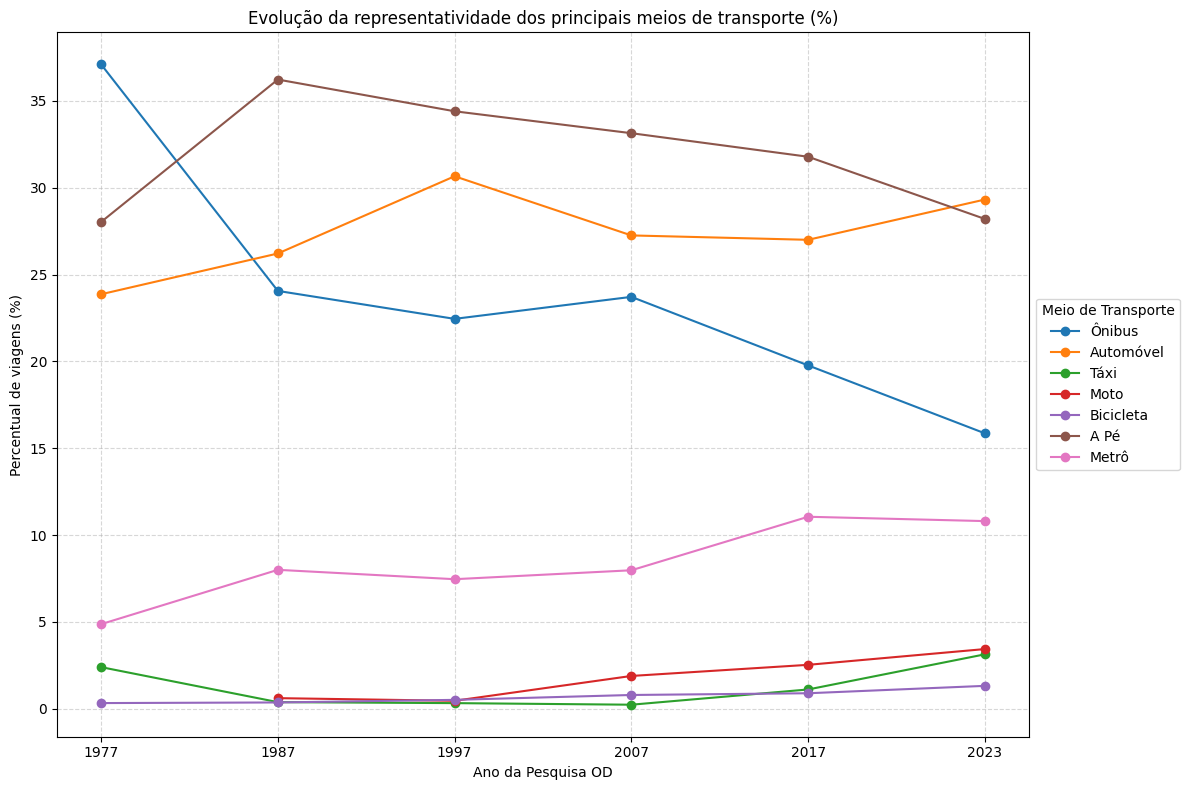

In [152]:
plt.figure(figsize=(12, 8))
for mode in final_df.index:
    plt.plot(final_df.columns, final_df.loc[mode], marker='o', label=mode)

plt.title('Evolução da representatividade dos principais meios de transporte (%)')
plt.xlabel('Ano da Pesquisa OD')
plt.ylabel('Percentual de viagens (%)')
plt.legend(title='Meio de Transporte', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()